<a href="https://colab.research.google.com/github/lostapple9/CovidLungDetectionModel/blob/main/Copy_of_covid_lung_detection_1_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import gc
import random
import matplotlib.pyplot as plt
import numpy as np
from cv2 import resize, imread, IMREAD_COLOR, IMREAD_GRAYSCALE, INTER_CUBIC
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

covid_set = ['/content/drive/MyDrive/covid19_lung_data/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/covid19_lung_data')]
normal_set = ['/content/drive/MyDrive/normal_lung_data/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/normal_lung_data')]
patient_zero_unkown_set = ['/content/drive/MyDrive/patient_zero_unknow/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/patient_zero_unknow')]

#put patient's x ray in the patient_zero_unkown_set dataset, in other words put it in the (content/drive/MyDrive/patient_zero_unknow) drive


In [ ]:
print(normal_set)
print(covid_set)
print(patient_zero_unkown_set)

['/content/drive/MyDrive/normal_lung_data/Normal-10.png', '/content/drive/MyDrive/normal_lung_data/Normal-100.png', '/content/drive/MyDrive/normal_lung_data/Normal-1.png', '/content/drive/MyDrive/normal_lung_data/Normal-101.png', '/content/drive/MyDrive/normal_lung_data/Normal-103.png', '/content/drive/MyDrive/normal_lung_data/Normal-105.png', '/content/drive/MyDrive/normal_lung_data/Normal-106.png', '/content/drive/MyDrive/normal_lung_data/Normal-104.png', '/content/drive/MyDrive/normal_lung_data/Normal-102.png', '/content/drive/MyDrive/normal_lung_data/Normal-107.png', '/content/drive/MyDrive/normal_lung_data/Normal-111.png', '/content/drive/MyDrive/normal_lung_data/Normal-115.png', '/content/drive/MyDrive/normal_lung_data/Normal-108.png', '/content/drive/MyDrive/normal_lung_data/Normal-114.png', '/content/drive/MyDrive/normal_lung_data/Normal-112.png', '/content/drive/MyDrive/normal_lung_data/Normal-113.png', '/content/drive/MyDrive/normal_lung_data/Normal-109.png', '/content/drive/

In [ ]:
total = normal_set + covid_set
random.shuffle(total)
random.shuffle(patient_zero_unkown_set)

In [ ]:
split = 0.8
# slice_reserve = 9;
slice_reserve = len(patient_zero_unkown_set)
slice_total = len(normal_set)
slice_list_max = slice_total - slice_reserve
slice_list = int(slice_list_max*split)

train_set = total[:slice_list]
test_set = total[slice_list: slice_list_max]
# reserve_set = total[slice_list_max: slice_total]

reserve_set = patient_zero_unkown_set[0:slice_reserve]


In [ ]:

del covid_set,normal_set,patient_zero_unkown_set
gc.collect()

50

In [ ]:
width = 250
height = 250



In [ ]:
X_train = []
X_test = []
X_reserve = []

y_train = []
y_test = []
y_reserve = []


In [ ]:
# a 0 label indicates positive covid pneumonia
# a 1 label indicates no pneumonia
def preprocess_image_set(data_set):
  X_set = []
  y_set = []
  for image in data_set:
    try:
      X_set.append(resize(imread(image), (width, height), interpolation = INTER_CUBIC))
      if 'COVID-' in image:
        y_set.append(0)
      else:
        y_set.append(1)
    except Exception:
      print('failed to format: ', image)
  return X_set, y_set

In [ ]:
def show_images(image_set, label_set):
  plt.figure(figsize = (10,10))
  # for i in range(9):
  first_img = 0
  last_ima = 9
  for i in range(first_img,last_ima):
    ax = plt.subplot(3,3, i + 1 - first_img)
    plt.imshow(image_set[i])
    if label_set[i] == 0:
      plt.title("positive covid pneumonia")
    elif label_set[i] == 1:
      plt.title("no pneumonia")
    # plt.title(label_set[i])
    plt.axis("off")


In [ ]:
X_train, y_train = preprocess_image_set(train_set)

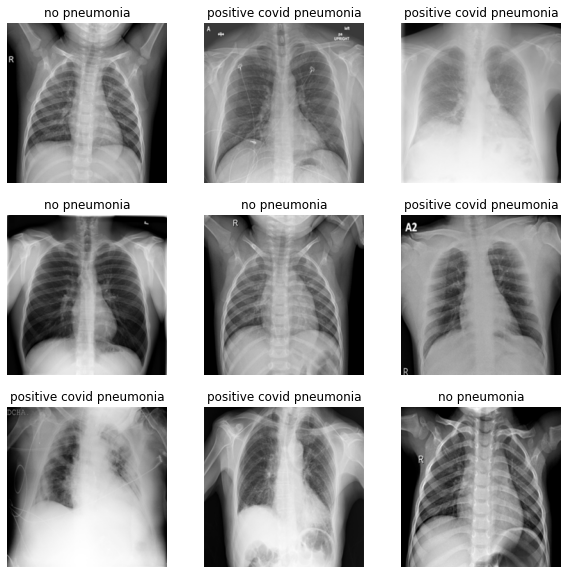

In [ ]:
# show the first 9 images from training set
# update: show the first_img to the last_ima from training set
# a 0 label indicates positive covid pneumonia
# a 1 label indicates no pneumonia
show_images(X_train, y_train)

In [ ]:
X_test, y_test = preprocess_image_set(test_set)

In [ ]:
X_reserve, y_reserve = preprocess_image_set(reserve_set)

In [ ]:
del train_set, test_set, reserve_set
gc.collect()

18158

In [ ]:
# translate lists into numpy arrays
X_train =  np.array(X_train)
X_test = np.array(X_test)
X_reserve =  np.array(X_reserve)

y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (width, height,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, kernel_size = 3, activation = 'relu'))
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(600, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 128)      0

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 15)

Epoch 1/15
5/5 [==============================] - 16s 554ms/step - loss: 327.0679 - accuracy: 0.4932 - val_loss: 22.5832 - val_accuracy: 0.4474
Epoch 2/15
5/5 [==============================] - 1s 210ms/step - loss: 6.0571 - accuracy: 0.4662 - val_loss: 1.1555 - val_accuracy: 0.4474
Epoch 3/15
5/5 [==============================] - 1s 193ms/step - loss: 0.5133 - accuracy: 0.7230 - val_loss: 0.5452 - val_accuracy: 0.8158
Epoch 4/15
5/5 [==============================] - 1s 191ms/step - loss: 0.5889 - accuracy: 0.7770 - val_loss: 0.9415 - val_accuracy: 0.6842
Epoch 5/15
5/5 [==============================] - 1s 189ms/step - loss: 0.4698 - accuracy: 0.8176 - val_loss: 1.9707 - val_accuracy: 0.7368
Epoch 6/15
5/5 [==============================] - 1s 191ms/step - loss: 0.6386 - accuracy: 0.8041 - val_loss: 0.5648 - val_accuracy: 0.8158
Epoch 7/15
5/5 [==============================] - 1s 190ms/step - loss: 0.3246 - accuracy: 0.9122 - val_loss: 0.7020 - val_accuracy: 0.6316
Epoch 8/15
5/5 [

In [ ]:
history.history['accuracy']

[0.4932432472705841,
 0.46621620655059814,
 0.7229729890823364,
 0.7770270109176636,
 0.8175675868988037,
 0.8040540814399719,
 0.912162184715271,
 0.8648648858070374,
 0.9527027010917664,
 0.9527027010917664,
 0.9797297120094299,
 0.9797297120094299,
 0.9797297120094299,
 0.9527027010917664,
 0.9594594836235046]

In [ ]:
# make label predictions on unseen data
y_predict = model.predict(X_reserve[:slice_reserve])
y_pred = (y_predict > 0.5)

In [ ]:
y_pred = y_pred.tolist()

In [ ]:
y_predict = y_predict.tolist()
y_predict

[[8.025455144888838e-08],
 [1.4095303792135654e-25],
 [1.0],
 [1.0],
 [1.0],
 [0.028916465118527412],
 [6.070926367954949e-14],
 [1.0],
 [0.8223145008087158]]

In [ ]:
y_reserve

[0, 0, 0, 1, 1, 1, 0, 1, 1]

In [ ]:
real_pred = []
for i in range(len(y_predict)):
  print("predicted result: %0.5f percent probability does not have covid" % (y_predict[i][0]*100))

  real_pred.append(y_predict[i][0])

  if(y_reserve[i] == 0):
    print("Actual result: has covid")
  else:
    print("Actual result: does not have covid")
  print()
real_pred2 = [round(num) for num in real_pred]
print(real_pred2)
print(y_reserve)

result = 90
tem=None
for i in range(len(y_predict)):
  
  if real_pred2[i] != y_reserve[i]:
    tem = result - 10
  else:
    tem = tem
result_new = tem / result
print(str("%.2f" % result_new) + "% correct for the reserve X-rays")


predicted result: 0.00001 percent probability does not have covid
Actual result: has covid

predicted result: 0.00000 percent probability does not have covid
Actual result: has covid

predicted result: 100.00000 percent probability does not have covid
Actual result: has covid

predicted result: 100.00000 percent probability does not have covid
Actual result: does not have covid

predicted result: 100.00000 percent probability does not have covid
Actual result: does not have covid

predicted result: 2.89165 percent probability does not have covid
Actual result: does not have covid

predicted result: 0.00000 percent probability does not have covid
Actual result: has covid

predicted result: 100.00000 percent probability does not have covid
Actual result: does not have covid

predicted result: 82.23145 percent probability does not have covid
Actual result: does not have covid

[0, 0, 1, 1, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 0, 1, 1]
0.89% correct for the reserve X-rays


[[8.025455144888838e-08], [1.4095303792135654e-25], [1.0], [1.0], [1.0], [0.028916465118527412], [6.070926367954949e-14], [1.0], [0.8223145008087158]]


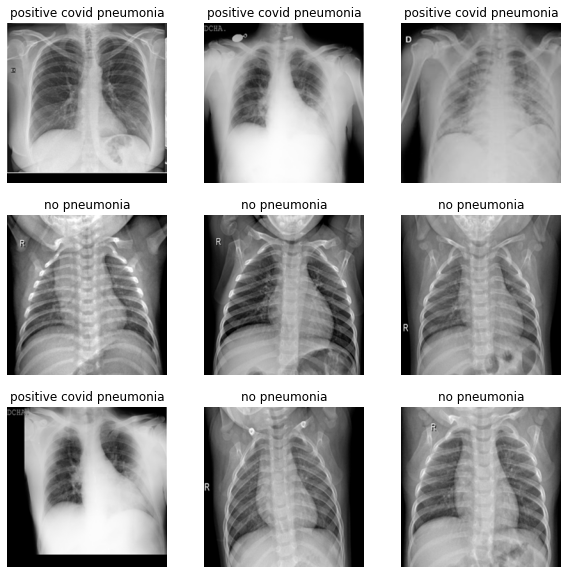

In [ ]:
def show_images2(image_set, label_set):
  plt.figure(figsize = (10,10))
  # for i in range(9):
  first_img = 0
  last_ima = 9

  
  for i in range(first_img,last_ima):
    ax = plt.subplot(3,3, i + 1 - first_img)
    plt.imshow(image_set[i])

    if label_set[i][0] < 0.5:
      plt.title("positive covid pneumonia")
    elif label_set[i][0] > 0.5:
      plt.title("no pneumonia")
    # plt.title(label_set[i])
    plt.axis("off")


# show the images from reserve set
# 1 = no covid, 0 = covid

# change the slice_reserve for more pictures

# theoretical, by ML
show_images(X_reserve, y_reserve)

print(y_predict)

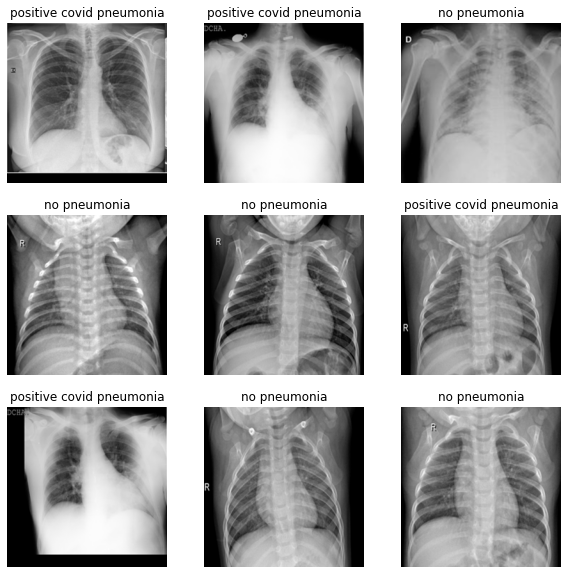

In [ ]:
show_images2(X_reserve, y_predict)

# actual 

In [ ]:
from sklearn.metrics import confusion_matrix

#event = has covid
#no-event = does not have covid
model_metric = confusion_matrix(y_reserve, y_pred)

In [ ]:
accuracy = (model_metric[0][0] + model_metric[1][1])/ (sum(map(sum, model_metric)))
accuracy

0.7777777777777778